### Descripción del proceso de unión de los datasets de metadatos y de reviews:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### EDA

Cargamos los archivos json y los concatenamos:

In [2]:
fl_hotels= pd.read_parquet('fl_hotels.parquet')

In [3]:
fl_hotels.head()

,user_id,time,rating,text,business name,address,description,latitude,longitude,category,avg_rating,num_of_reviews,price,state
0,1.006212e+20,2020-11-02 20:17:10.289,5,"The beach is simply beautiful, totally recomme...",Anna Maria Beach,"Anna Maria Beach, Holmes Beach, FL 34217",None,27.497579,-82.712635,Lodging,4.8,8,No Price,None
1,1.010228e+20,2021-01-12 01:37:06.400,5,If you want to feel lile you are living in an ...,Anna Maria Beach,"Anna Maria Beach, Holmes Beach, FL 34217",None,27.497579,-82.712635,Lodging,4.8,8,No Price,None
2,1.034052e+20,2021-03-08 02:05:03.569,5,"Quiet beach, highly recommend",Anna Maria Beach,"Anna Maria Beach, Holmes Beach, FL 34217",None,27.497579,-82.712635,Lodging,4.8,8,No Price,None
3,1.118156e+20,2021-05-15 19:45:25.511,5,(Translated by Google) The ideal place to admi...,Anna Maria Beach,"Anna Maria Beach, Holmes Beach, FL 34217",None,27.497579,-82.712635,Lodging,4.8,8,No Price,None
4,1.118296e+20,2020-08-28 00:58:58.361,4,None,Anna Maria Beach,"Anna Maria Beach, Holmes Beach, FL 34217",None,27.497579,-82.712635,Lodging,4.8,8,No Price,None


In [4]:
categories = fl_hotels['category'].unique()

# Imprimir los registros únicos
print(categories)

['Lodging' 'Hotel' 'Resort hotel' 'Motel' 'Inn' 'Health resort' 'Lodge'
 'Serviced accommodation' 'Holiday accommodation service'
 'Pet friendly accommodation' 'Retreat center' 'Indoor lodging'
 'Travellers lodge' 'Extended stay hotel' 'Self-catering accommodation'
 'Yoga retreat center' 'Cabin rental agency' 'Group accommodation'
 'Hostel' 'Hotel supply store']


In [5]:
#top de los hoteles con mejores calificaciones
media_rating = fl_hotels.groupby('business name')['rating'].mean()
top_15 = media_rating.sort_values(ascending=False).head(15)
print(top_15)

business name
Good Shepherd Pet Hospital                  5.000000
Bright N' Shine Pet Dental and Grooming     5.000000
Shine of Ft Lauderdale                      5.000000
Quail Creek Plantation                      5.000000
Marywood Retreat and Conference Center      5.000000
Ayurveda Health Retreat                     5.000000
Atlantis Salt Cave                          5.000000
Lotus Pond Center for Yoga and Health       4.944444
Beaches Jet Set Pets                        4.933333
Dog Bed & Breakfast                         4.916667
Land of Id                                  4.916667
GrandFloridianVilla                         4.909091
Sunset Beach Cottages of Treasure Island    4.909091
Doggie Doo's Pet Salon LLC                  4.900000
Kindred Home Community (New Streets)        4.888889
Name: rating, dtype: float64


### TOP 10 DE LOS HOTELES MÁS VISITADOS

In [6]:
conteo_gmap_id = fl_hotels['business name'].value_counts()
top_10_gmap_id = conteo_gmap_id.nlargest(10)

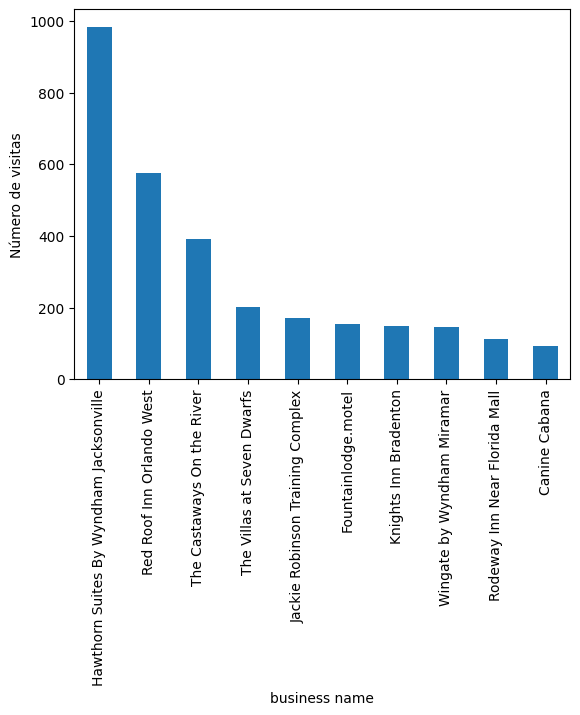

In [7]:
#Grafica de los hoteles mas visitados.
top_10_gmap_id.plot.bar()
plt.xlabel('business name')
plt.ylabel('Número de visitas')
plt.show()

### TOP 10 DE LAS CATEGORÍAS DE HOTEL MÁS VISITADOS

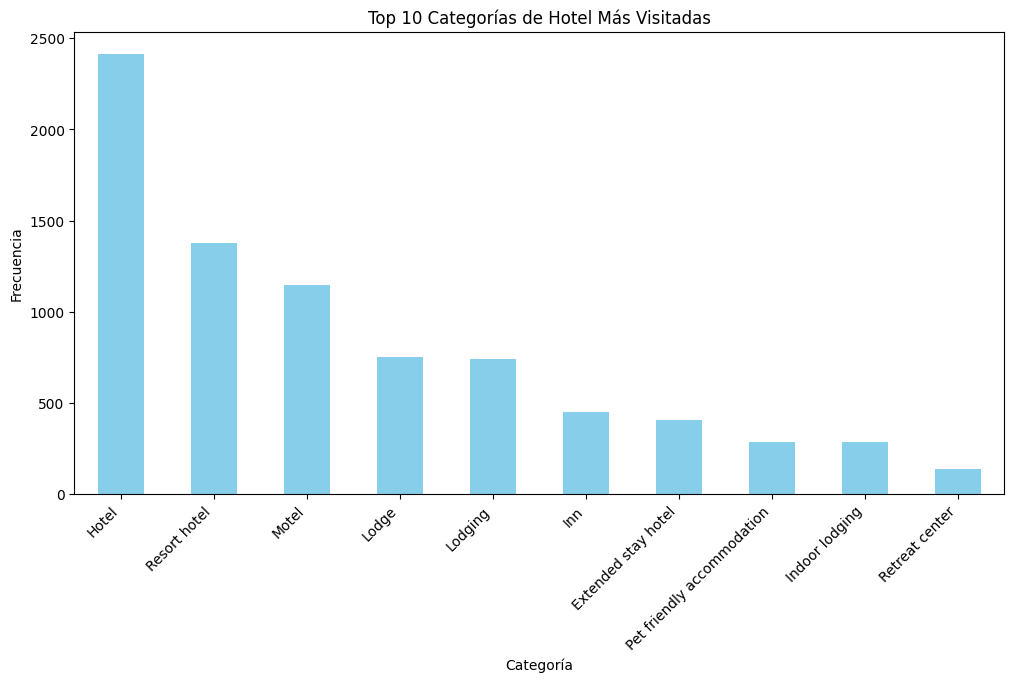

In [8]:
#Contamos la frecuencia de cada categoría contenida en el DataFrame filtrado
category_counts = fl_hotels['category'].value_counts()

# Seleccionamos las 10 categorías más frecuentes para graficarlos en el histograma
top_categories = category_counts.head(10)

# Se crear el histograma
plt.figure(figsize=(12, 6))
top_categories.plot(kind='bar', color='skyblue')
plt.title('Top 10 Categorías de Hotel Más Visitadas')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.show()

### HISTOGRAMA DE VISITAS DE CADA CATEGORÍA POR AÑO

<Figure size 1200x600 with 0 Axes>

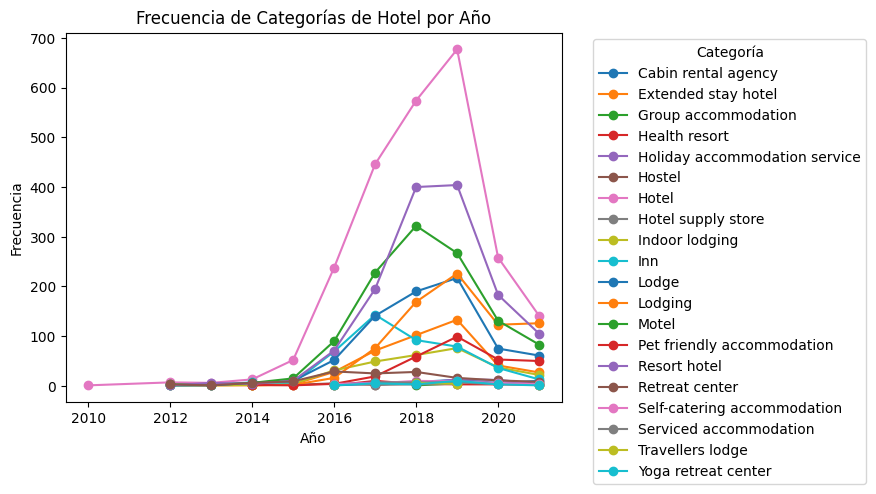

In [9]:

fl_hotels.loc[:, 'time'] = pd.to_datetime(fl_hotels['time'])

# Agrupar por año y contar la frecuencia de cada categoría
grouped_by_year = fl_hotels.groupby([fl_hotels['time'].dt.year, 'category']).size().unstack()

# Crear el gráfico de líneas para cada categoría
plt.figure(figsize=(12, 6))
grouped_by_year.plot(marker='o')
plt.title('Frecuencia de Categorías de Hotel por Año')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<Figure size 1200x600 with 0 Axes>

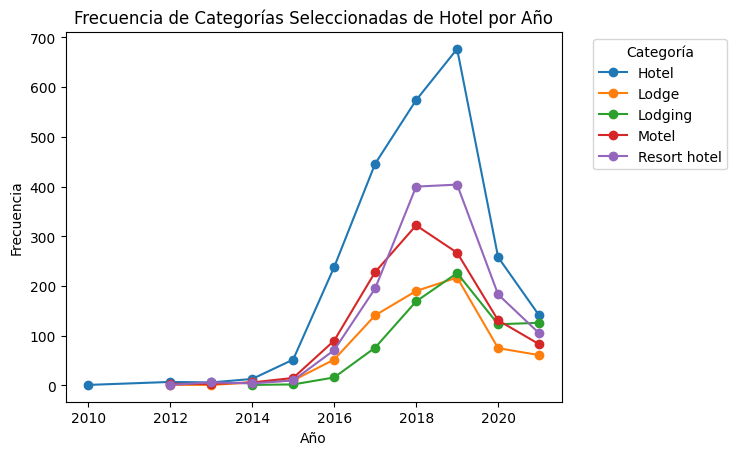

In [10]:
# Filtramos el DataFrame 
selected_categories = ['Resort hotel', 'Hotel', 'Motel', 'Lodge', 'Lodging']
filtered_by_categories = fl_hotels[fl_hotels['category'].isin(selected_categories)]

# Agrupar por año y contar la frecuencia de cada categoría
grouped_by_year = filtered_by_categories.groupby([filtered_by_categories['time'].dt.year, 'category']).size().unstack()

# Crear el gráfico de líneas para cada categoría
plt.figure(figsize=(12, 6))
grouped_by_year.plot(marker='o')
plt.title('Frecuencia de Categorías Seleccionadas de Hotel por Año')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Rating vs Reviews: 

La mayoria de reviews son de 3.0 a 5 estrellas. Lo que da a entender opiniones variadas acerca de los negocios por parte de los clientes.

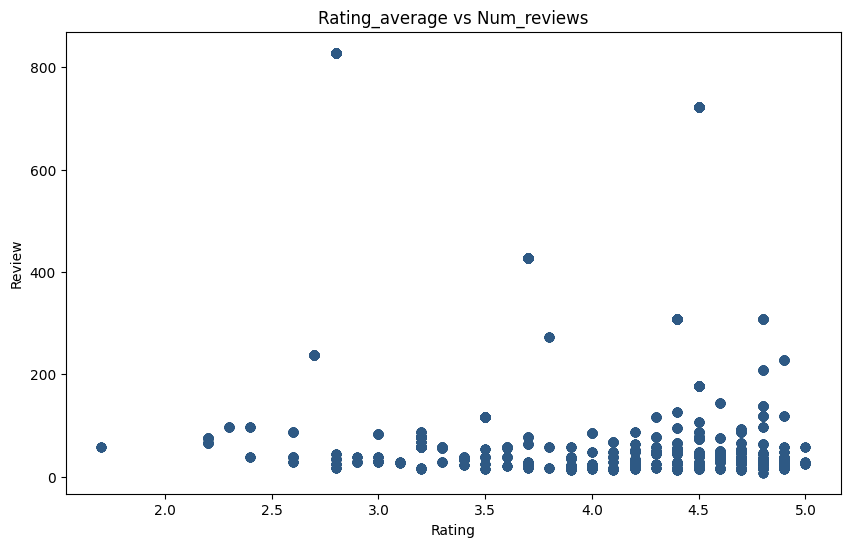

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(fl_hotels['avg_rating'], fl_hotels['num_of_reviews'], color='#2E5984') #, width=0.25
#sns.violinplot(x=metdat_sitios_fl['stars'], y=metdat_sitios_fl['review_count'], inner="quartile", palette="pastel")
plt.title('Rating_average vs Num_reviews')
plt.xlabel('Rating')
plt.ylabel('Review')
#plt.grid(True)
plt.show()

### Numero de negocios (categoria) de la muestra de google maps en el estado de Nevada.

In [12]:
columns_to_count = ['category']

for column in columns_to_count:
    counts = fl_hotels[column].value_counts()
    print(f"Counts for column '{column}':")
    print(counts)

Counts for column 'category':
category
Hotel                            2413
Resort hotel                     1379
Motel                            1148
Lodge                             754
Lodging                           739
Inn                               448
Extended stay hotel               408
Pet friendly accommodation        287
Indoor lodging                    285
Retreat center                    136
Holiday accommodation service      44
Cabin rental agency                41
Self-catering accommodation        37
Serviced accommodation             24
Health resort                      23
Yoga retreat center                23
Hostel                             19
Travellers lodge                   12
Group accommodation                10
Hotel supply store                 10
Name: count, dtype: int64


### Verificación de Outliers en rating y reviews

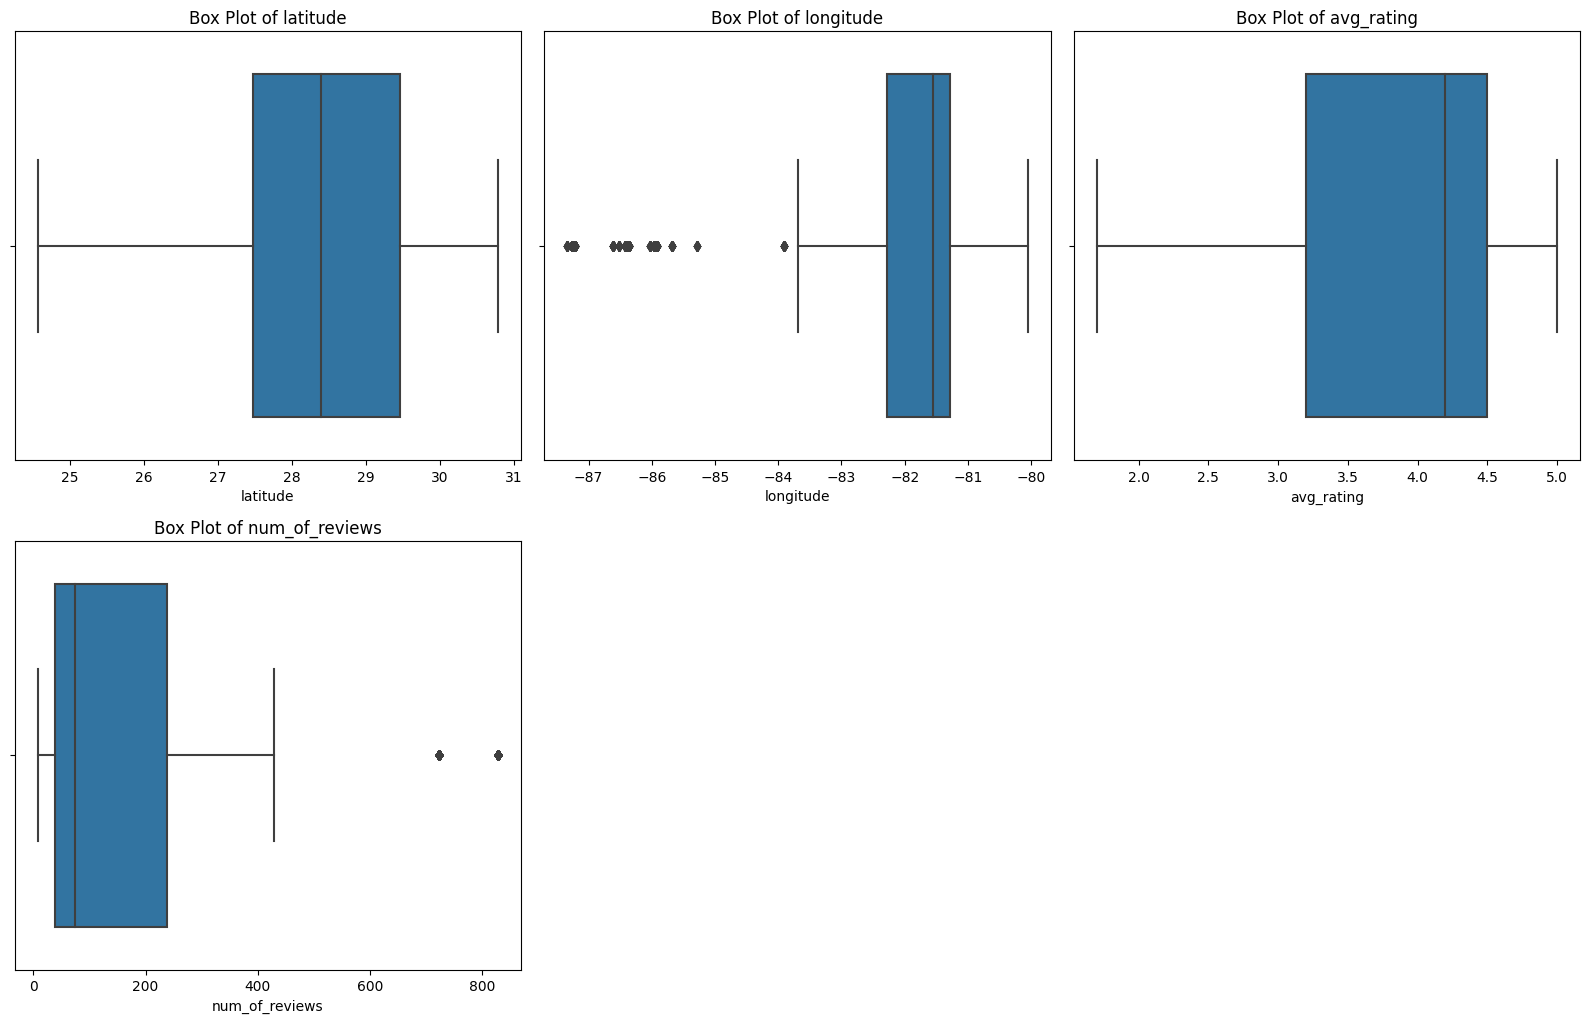

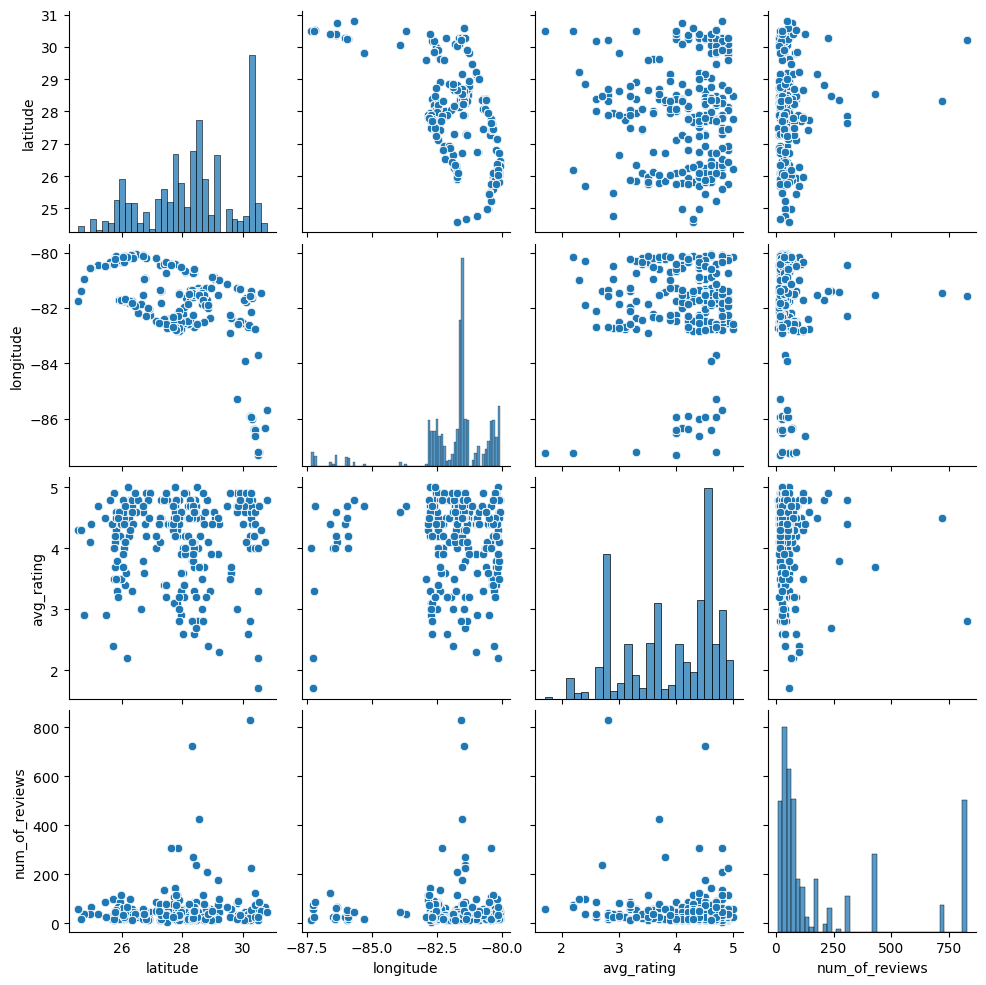

In [14]:
numerical_columns = ['latitude'	,'longitude','avg_rating','num_of_reviews']

# Create subplots for each numerical column
fig = plt.figure(figsize=(16, 15))
for i, column in enumerate(numerical_columns):
    ax = fig.add_subplot(3, 3, i+1)
    sns.boxplot(x=fl_hotels[column], ax=ax)
    ax.set_title(f"Box Plot of {column}")

plt.tight_layout()
plt.show()

# Create scatter plots for pairwise combinations of numerical columns
sns.pairplot(fl_hotels[numerical_columns])
plt.show()

### Categorías más comentadas:

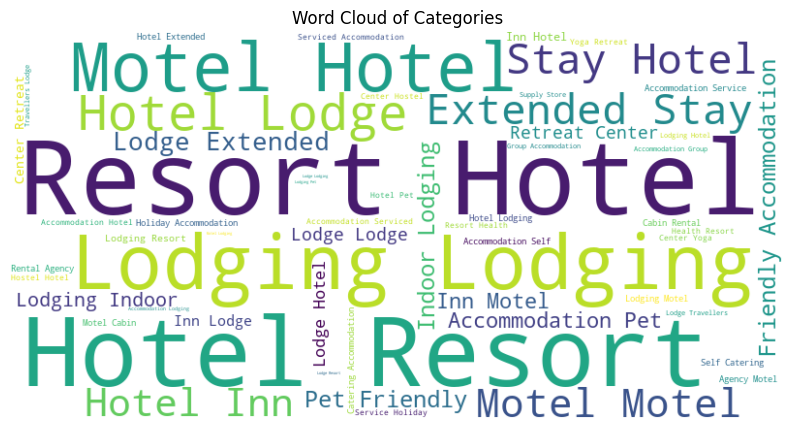

In [15]:
from wordcloud import WordCloud

fl_hotels.loc[:, 'category'] = fl_hotels['category'].str.title()  # Apply .str.title() to the 'category' Series
text = ' '.join(fl_hotels['category'].astype(str).tolist())

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Categories')
plt.show()